In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
hd = pd.read_csv("C:/Users/user/ML_Algorithms_project_ICTA/humidity-prediction/dataset/weather-history.csv")

In [3]:
hd

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
hd.isna()   #guess no NaN values(?)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
hd.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
x_train,x_test,y_train,y_test = train_test_split(hd['Apparent Temperature (C)'],hd["Humidity"],test_size = 0.5,random_state = 24)

In [7]:
x_train

88823    17.111111
324      15.066667
3750     17.322222
8184     16.922222
22404    22.433333
           ...    
21633    19.905556
59537     7.172222
85393    15.594444
80064    16.616667
899      24.966667
Name: Apparent Temperature (C), Length: 48226, dtype: float64

In [8]:
x_test

5859      9.444444
79536    -1.566667
83236    23.900000
34616    14.844444
63399     0.722222
           ...    
94174    10.433333
65422    22.727778
74588    23.805556
87102    22.083333
95953    14.772222
Name: Apparent Temperature (C), Length: 48227, dtype: float64

In [9]:
y_train

88823    0.75
324      0.86
3750     0.93
8184     0.61
22404    0.75
         ... 
21633    0.87
59537    0.93
85393    0.91
80064    0.87
899      0.56
Name: Humidity, Length: 48226, dtype: float64

In [10]:
y_test

5859     0.93
79536    0.64
83236    0.69
34616    0.69
63399    0.66
         ... 
94174    0.82
65422    0.67
74588    0.46
87102    0.60
95953    0.93
Name: Humidity, Length: 48227, dtype: float64

In [11]:
model = LinearRegression()

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train.values.reshape(-1,1))
y_train = sc.fit_transform(y_train.values.reshape(-1,1))
x_test = sc.fit_transform(x_test.values.reshape(-1,1))
y_test = sc.fit_transform(y_test.values.reshape(-1,1))

In [13]:
y_test

array([[ 0.99706629],
       [-0.48635202],
       [-0.23059024],
       ...,
       [-1.40709441],
       [-0.69096144],
       [ 0.99706629]])

In [14]:

model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
y_pred

array([[ 0.07941192],
       [ 0.70192344],
       [-0.73783075],
       ...,
       [-0.73249135],
       [-0.63512578],
       [-0.2217932 ]])

In [17]:
mse = mean_squared_error(y_test, y_pred)

In [18]:
mse

0.6384134593413423

In [19]:
rmse = np.sqrt(mse)  
rmse

0.7990077967963406

In [20]:
r2 = r2_score(y_test,y_pred)   #r-square value
r2

0.3615865406586577

In [21]:

new_data = pd.DataFrame({"Apparent Temperature (C)": [22,44,33]})
new_data_scaled = sc.transform(new_data.values.reshape(-1,1))
new_humidity = model.predict(new_data_scaled)
print("Predicted humidity:", new_humidity)

Predicted humidity: [[ -65.67991492]
 [-133.6302325 ]
 [ -99.65507371]]


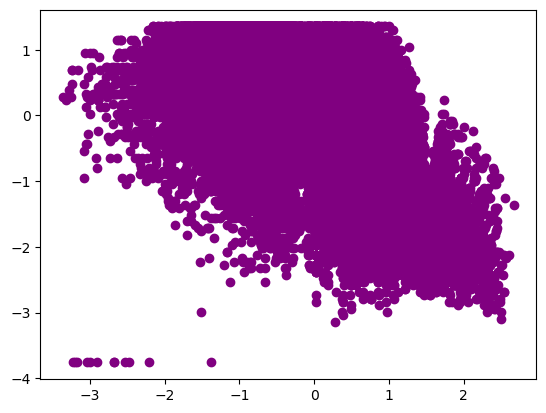

In [22]:
plt.scatter(x_test,y_test,color="purple")

In [23]:
hd.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [24]:
x_train,x_test,p_train,p_test = train_test_split(hd['Apparent Temperature (C)'],hd["Pressure (millibars)"],test_size = 0.5,random_state = 1)

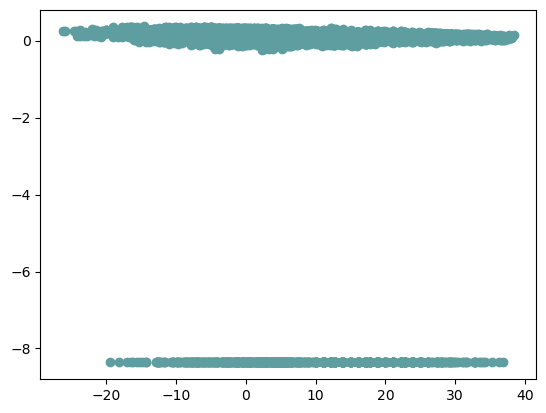

In [25]:
p_test = sc.fit_transform(p_test.values.reshape(-1,1))
plt.scatter(x_test,p_test,color="cadetblue")